In [1]:
import pandas as pd
import numpy as np

In [2]:
df_airplane = pd.read_csv('Airplane1.csv')
df_airplane = df_airplane.drop(columns=['Unnamed: 0', 'id'], axis=1)
df_airplane.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df_airplane.iloc[:, 11:-1].head()

,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,3,5,5,4,3,4,4,5,5,25,18.0
1,3,1,1,1,5,3,1,4,1,1,6.0
2,5,5,5,4,3,4,4,4,5,0,0.0
3,2,2,2,2,5,3,1,4,2,11,9.0
4,5,5,3,3,4,4,3,3,3,0,0.0


In [4]:
df_airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [5]:
df_airplane[df_airplane.duplicated(keep=False)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [6]:
print(f'Số dữ liệu bị trùng là: {df_airplane.duplicated().sum()}')

Số dữ liệu bị trùng là: 0


In [7]:
df_airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

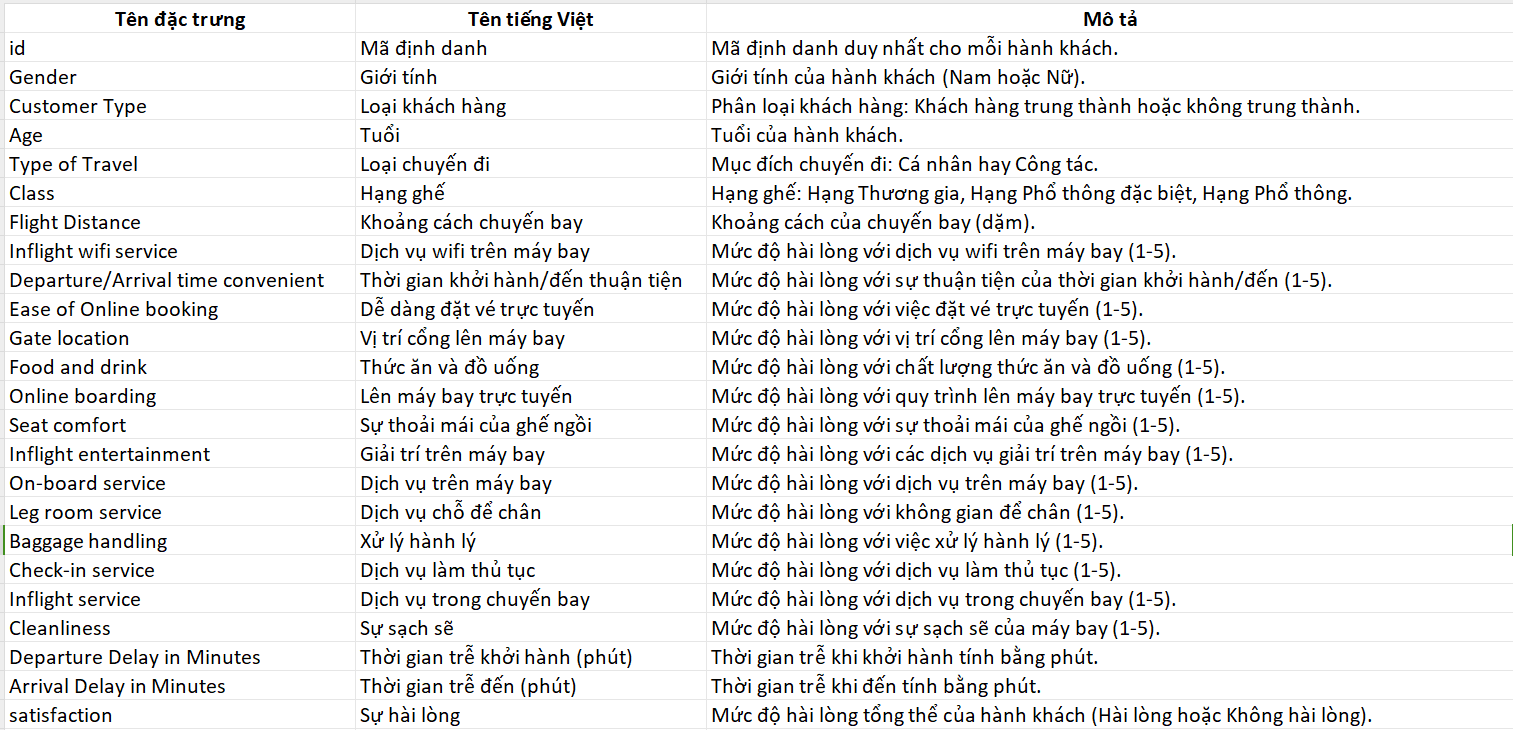

In [8]:
numeric_col = ['Age', 'Flight Distance', 'Inflight wifi service',
                'Departure/Arrival time convenient', 'Ease of Online booking',
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service',
                'Baggage handling', 'Checkin service', 'Inflight service',
                'Cleanliness', 'Departure Delay in Minutes',
                'Arrival Delay in Minutes']
len(numeric_col)

18

In [9]:
categorical_col = [col for col in df_airplane.columns if col not in numeric_col]
categorical_col

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [10]:
# Xem phan bo data ban dau
import matplotlib.pyplot as plt
import seaborn as sns

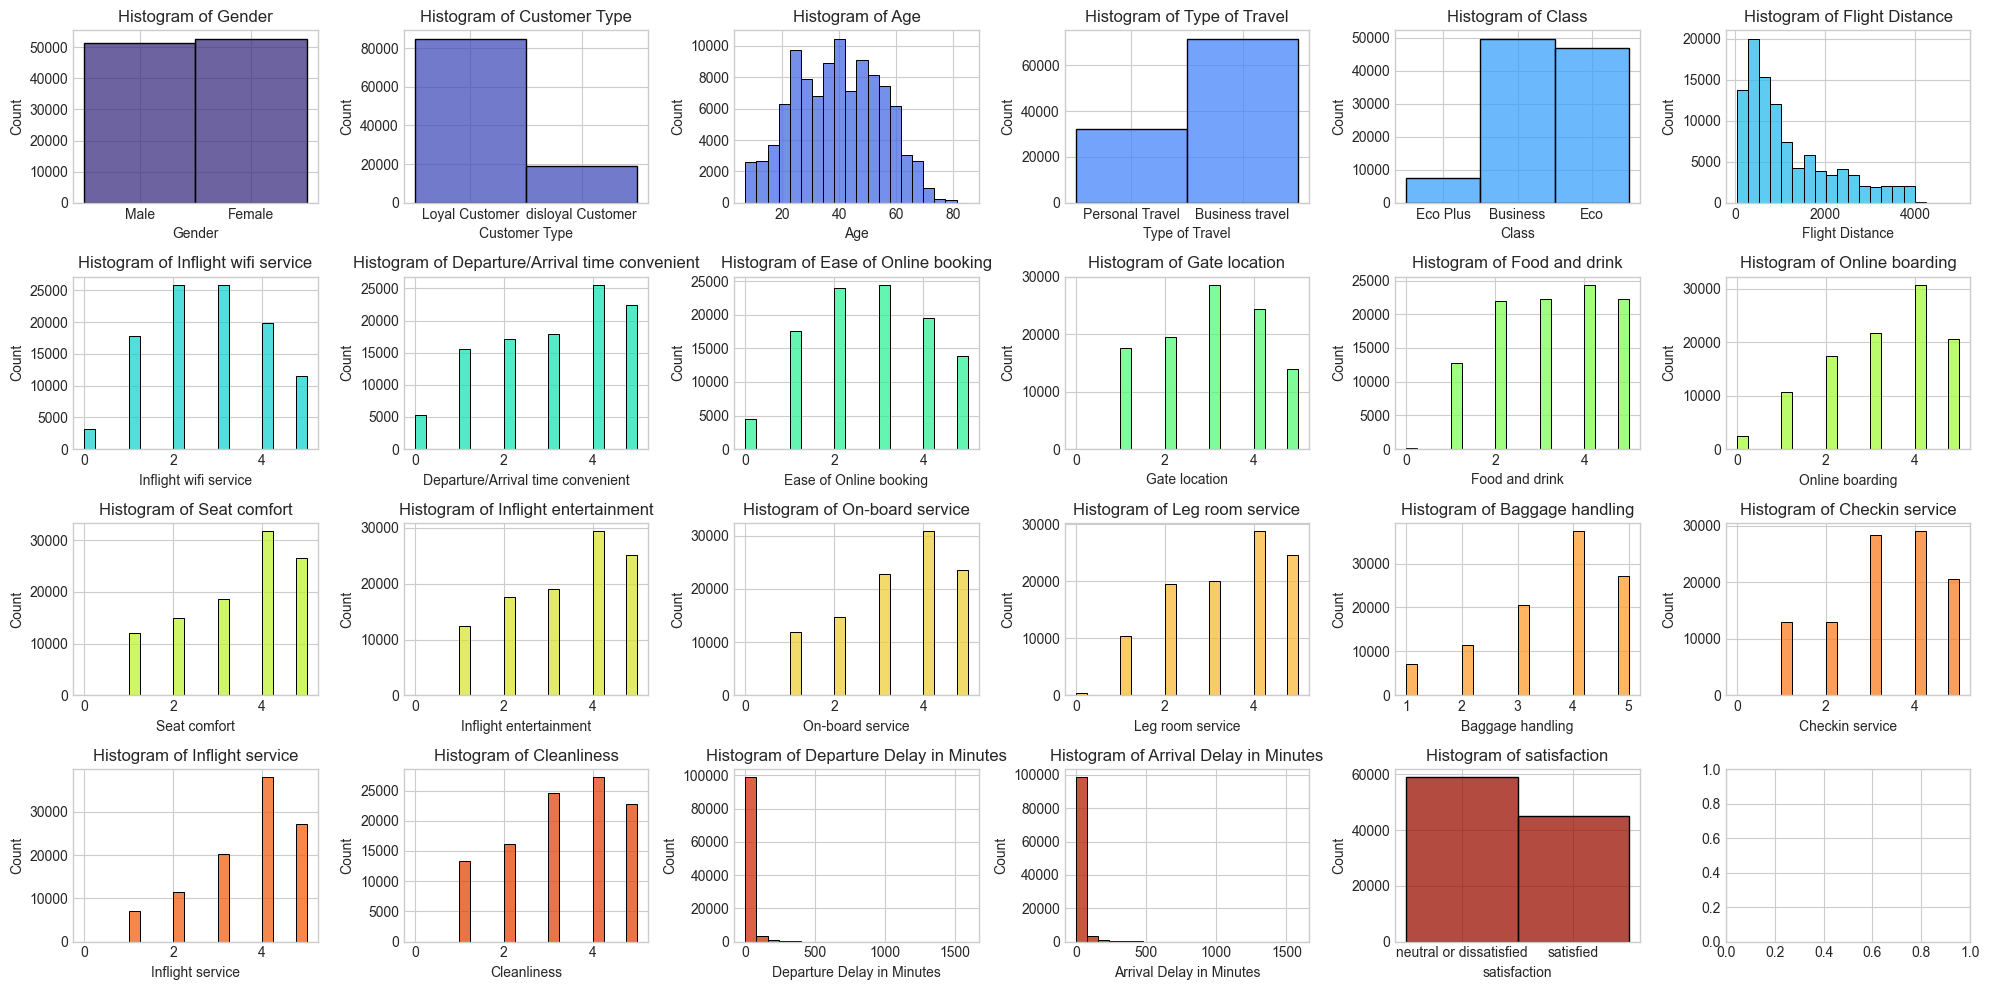

In [11]:
plt.style.use('seaborn-v0_8-whitegrid')
vibrant_palette = sns.color_palette("turbo", len(df_airplane.columns))

fig, axes = plt.subplots(4, 6, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df_airplane.columns):
    sns.histplot(data=df_airplane[col], ax=axes[i], bins=20,  color=vibrant_palette[i % len(vibrant_palette)])
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()

C:\Users\LE HOANG GIA VI\AppData\Local\Temp\ipykernel_17196\1011724765.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_airplane, x='satisfaction', y=col, ax=ax, errorbar=None, palette= 'Set2')
C:\Users\LE HOANG GIA VI\AppData\Local\Temp\ipykernel_17196\1011724765.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_airplane, x='satisfaction', y=col, ax=ax, errorbar=None, palette= 'Set2')
C:\Users\LE HOANG GIA VI\AppData\Local\Temp\ipykernel_17196\1011724765.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_air

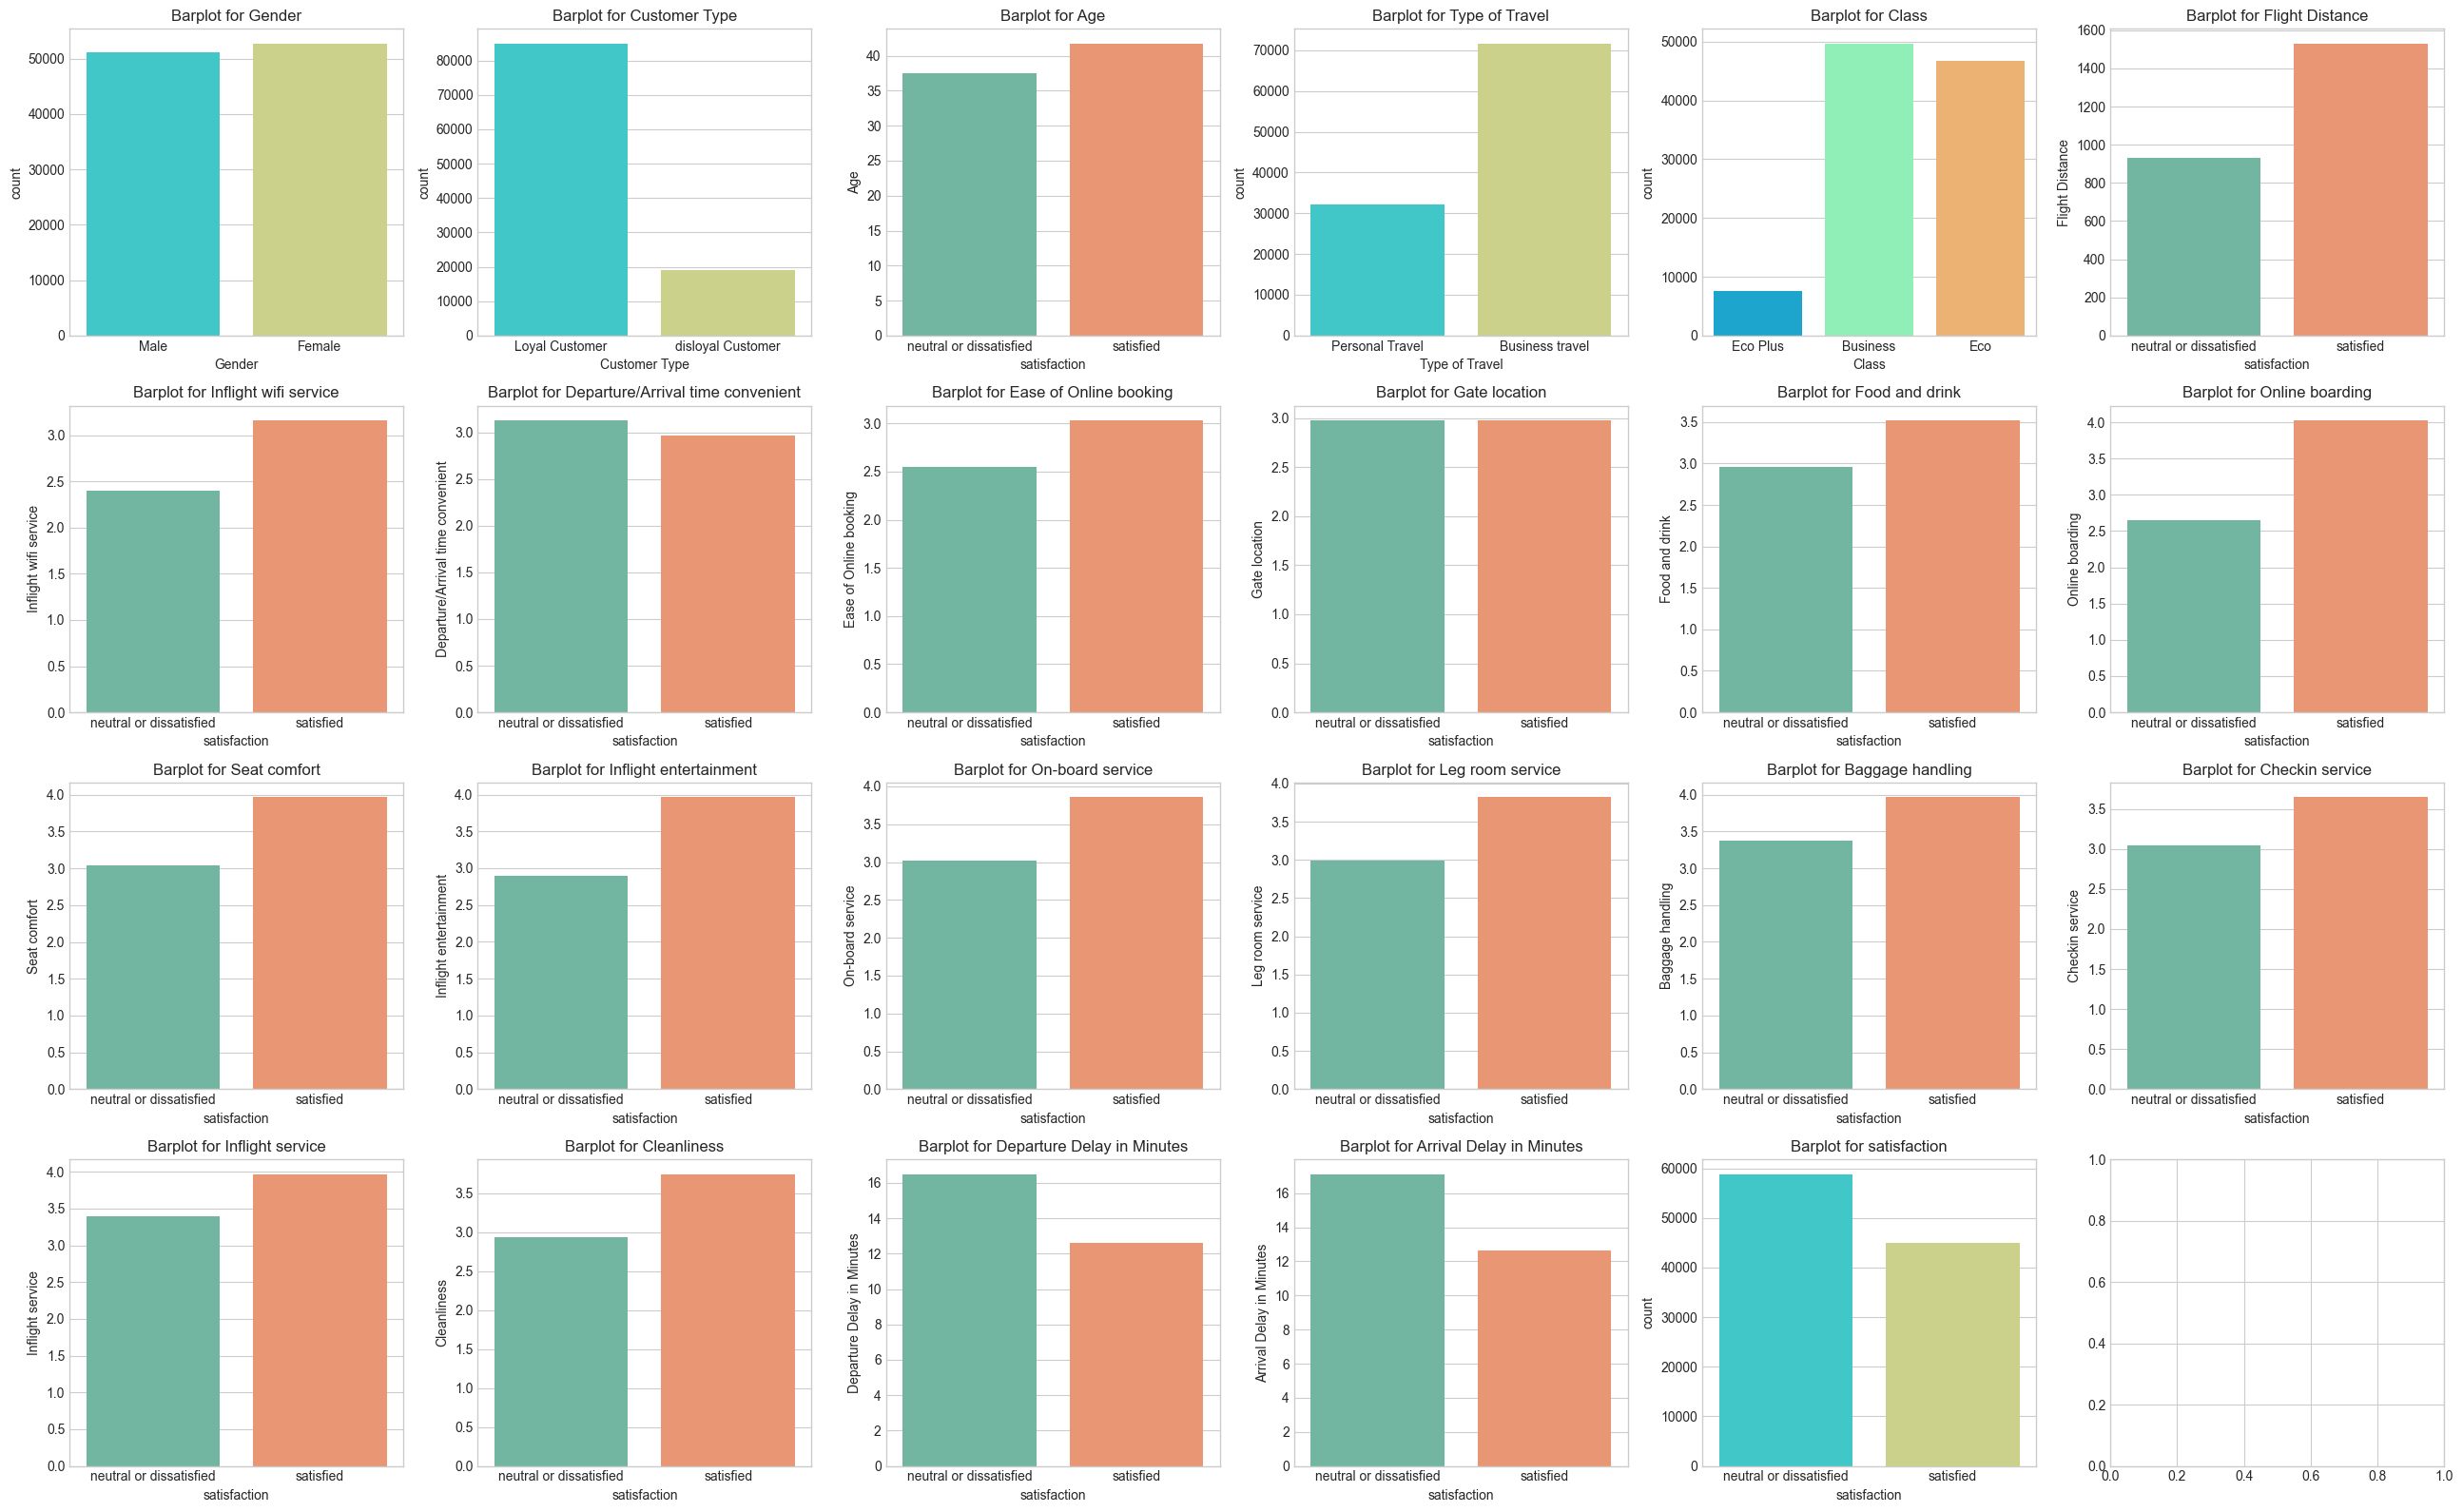

In [12]:
fig, axes = plt.subplots(figsize=(26, 16), nrows=4, ncols=6)
axes = axes.flatten()

# Tạo biểu đồ barplot cho từng cột
for i, col in enumerate(df_airplane.columns):
    ax = axes[i]
    if df_airplane[col].dtype == 'object':
        # Với các cột phân loại, đếm số lượng từng giá trị
        sns.countplot(data=df_airplane, x=col, hue=col, ax=ax, palette='rainbow')
    else:
        # Với các cột số, vẽ biểu đồ phân bố trung bình theo trạng thái satisfaction
        sns.barplot(data=df_airplane, x='satisfaction', y=col, ax=ax, errorbar=None, palette= 'Set2')
    ax.set_title(f'Barplot for {col}')

plt.tight_layout()
plt.show();


In [13]:
df_airplane.groupby('satisfaction')['Customer Type'].value_counts()

satisfaction             Customer Type    
neutral or dissatisfied  Loyal Customer       44390
                         disloyal Customer    14489
satisfied                Loyal Customer       40533
                         disloyal Customer     4492
Name: count, dtype: int64

In [14]:
df_airplane.select_dtypes(include='object').columns


Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

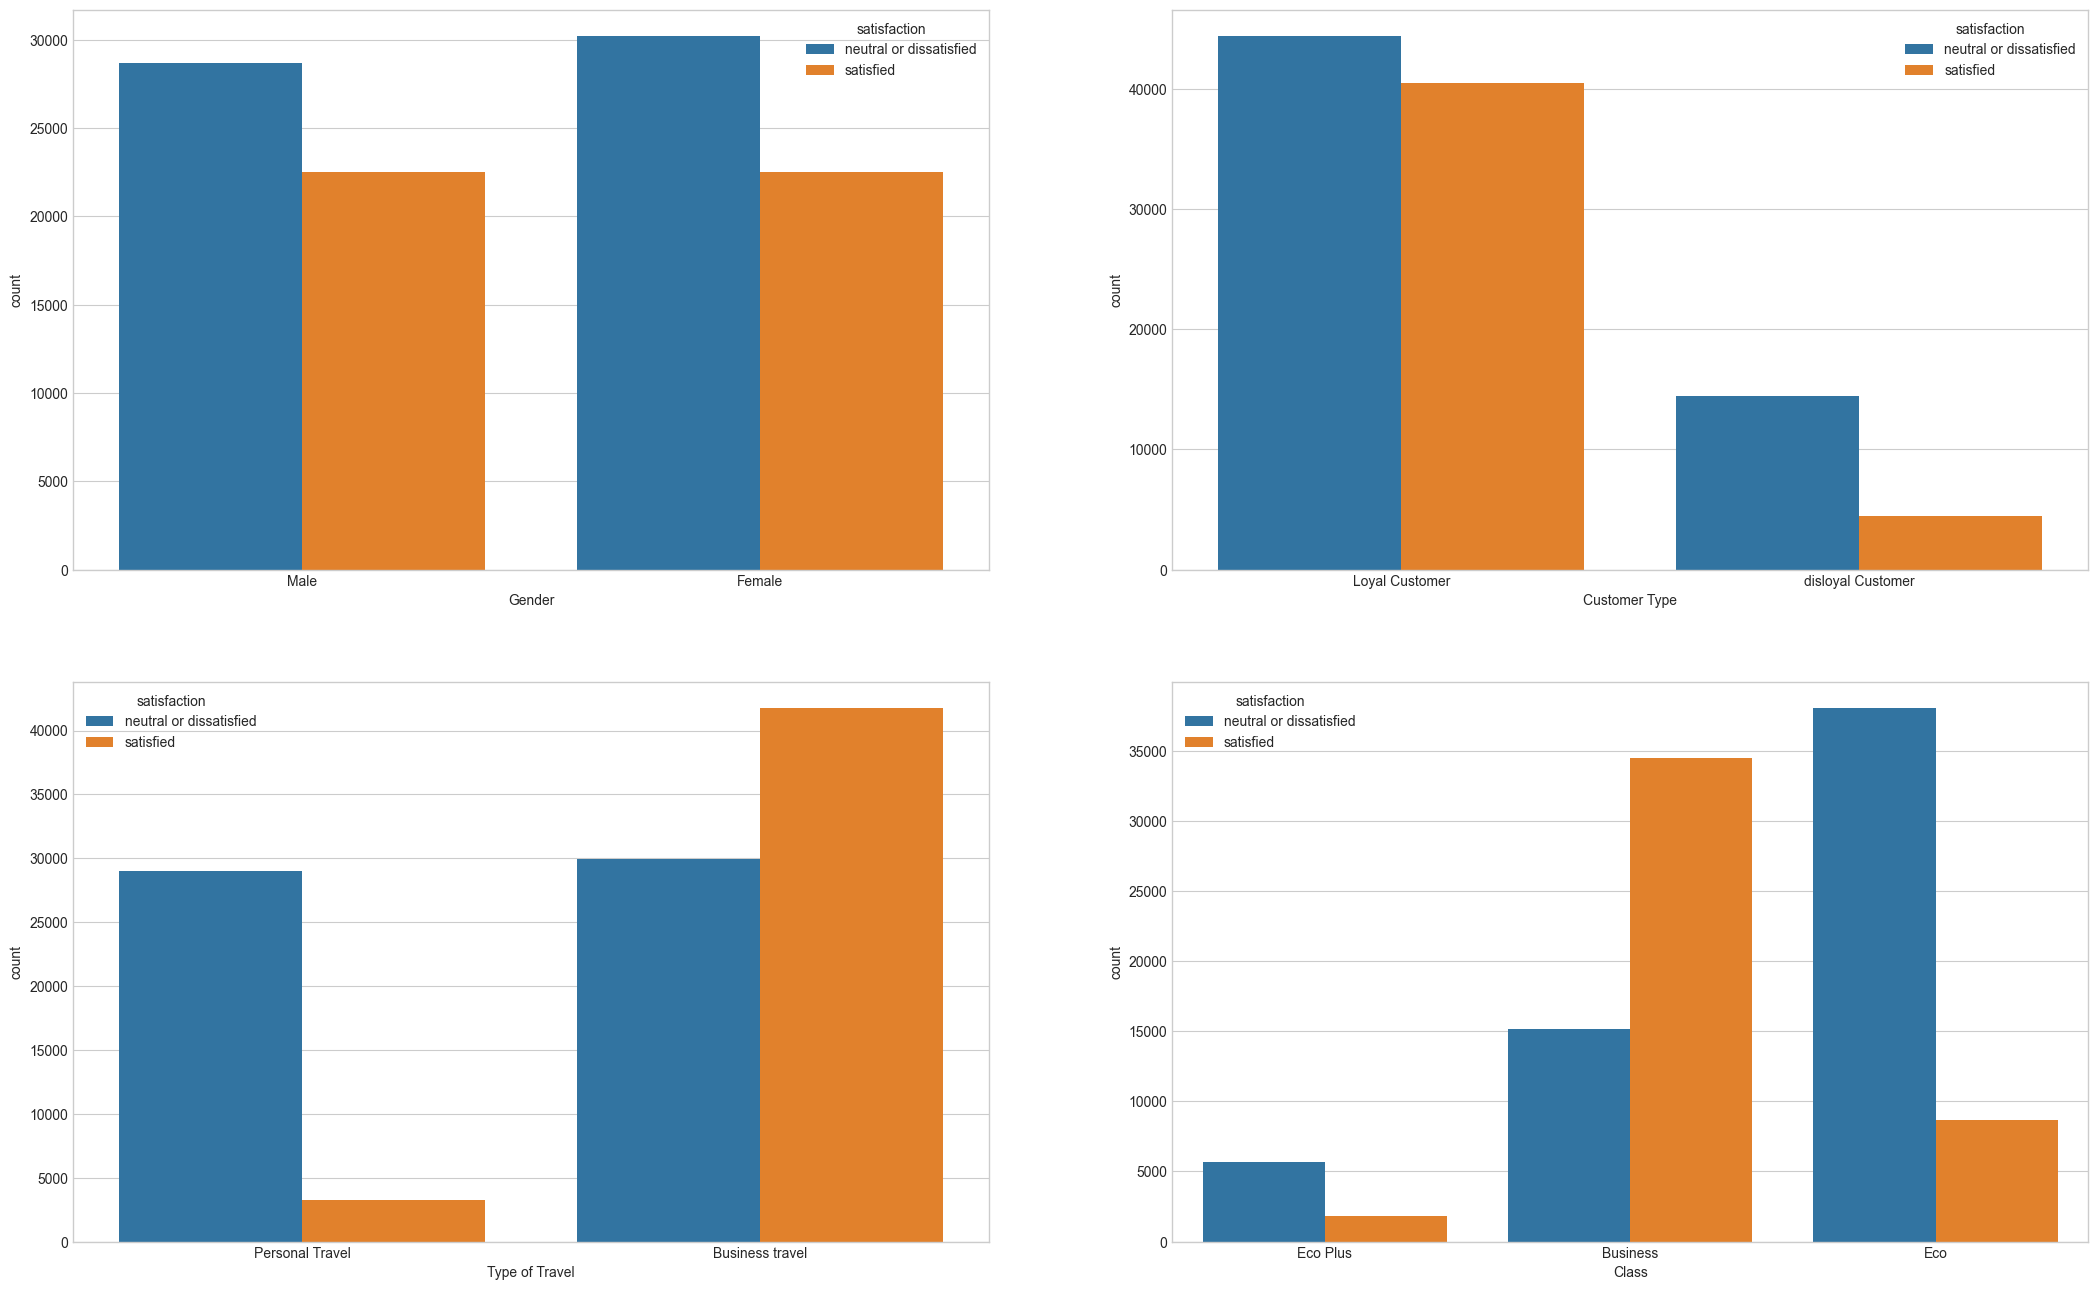

In [15]:
fig, ax = plt.subplots(figsize=(26,16), nrows=2, ncols=2)
ax = ax.flatten()

for i, col in enumerate(df_airplane[['Gender', 'Customer Type', 'Type of Travel', 'Class']]):
    if df_airplane[col].dtype == 'object':
        sns.countplot(df_airplane, x=col, hue = 'satisfaction', ax = ax[i])

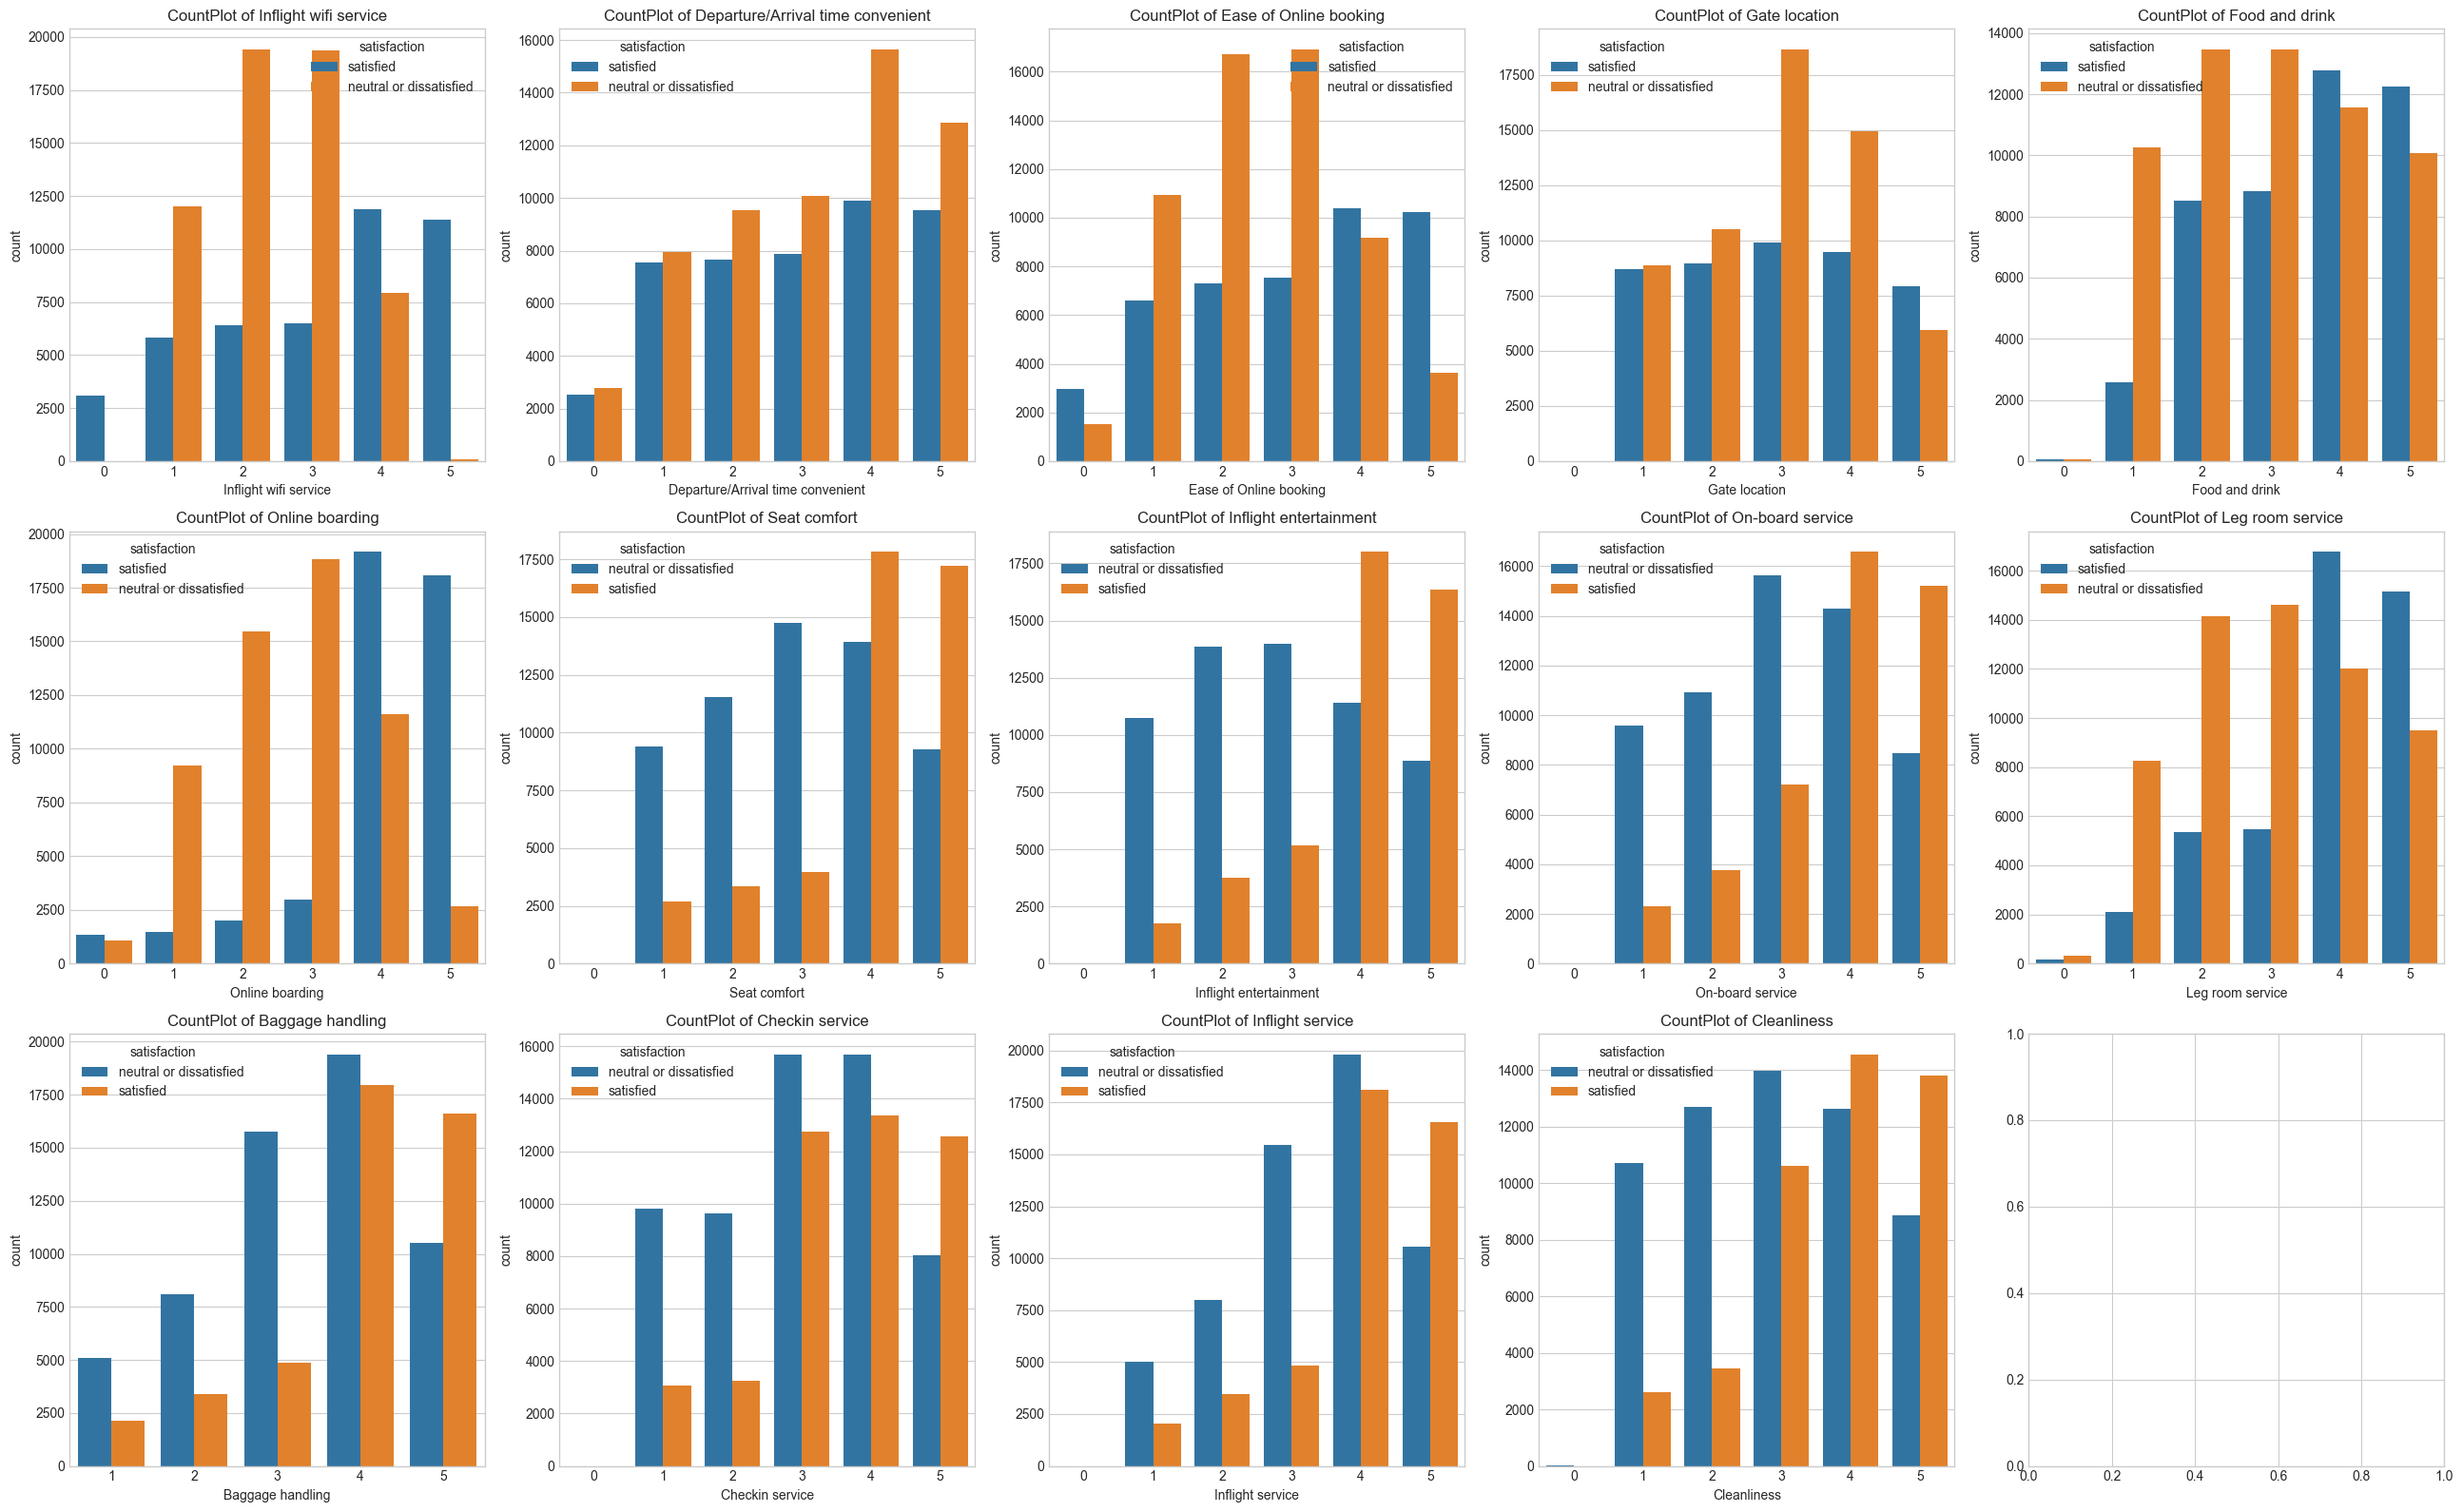

In [16]:
fig, ax = plt.subplots(figsize=(26,16), nrows=3, ncols=5)
ax = ax.flatten()

for i, col in enumerate(df_airplane[numeric_col].drop(columns=['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']).columns):
    if df_airplane[col].dtype == 'int64' or df_airplane[col].dtype == 'float64':
        sns.countplot(df_airplane, x=col, hue = 'satisfaction', ax = ax[i])
        ax[i].set_title(f'CountPlot of {col}')
plt.tight_layout()

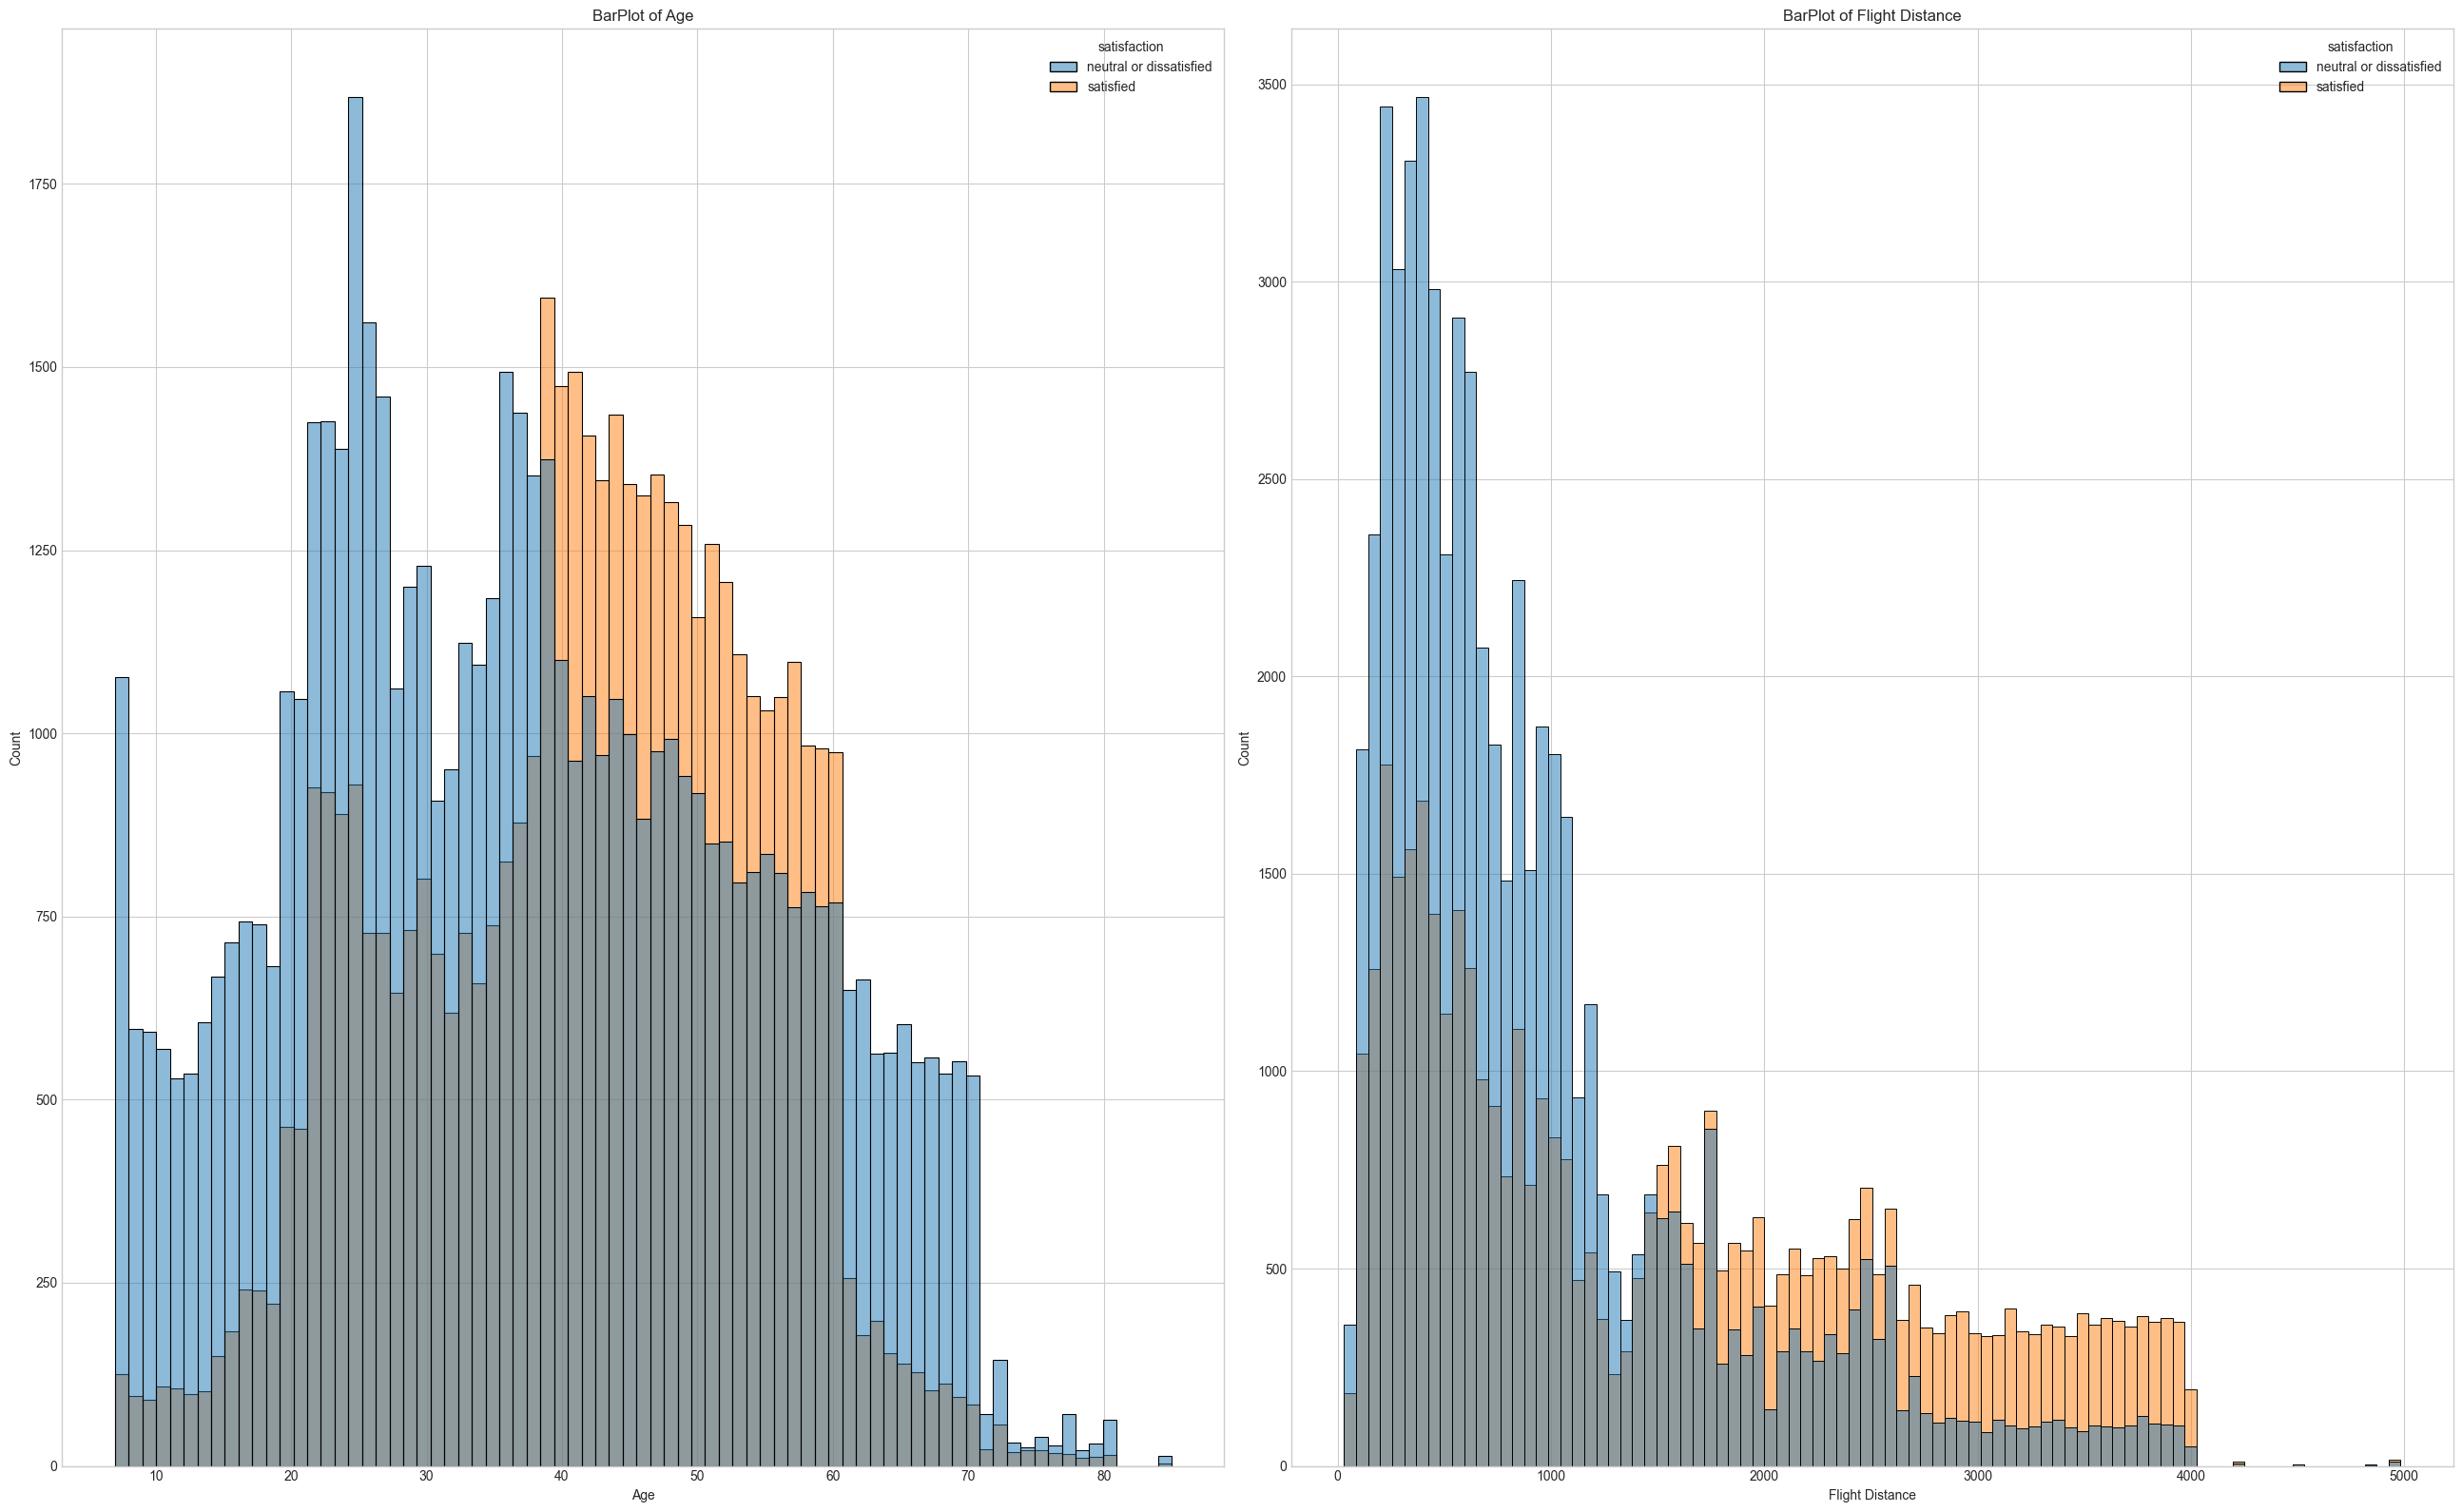

In [17]:
fig, ax = plt.subplots(figsize=(26,16), nrows=1, ncols=2)
ax = ax.flatten()

for i, col in enumerate(df_airplane[['Age', 'Flight Distance']]):
    if df_airplane[col].dtype == 'int64' or df_airplane[col].dtype == 'float64':
        sns.histplot(df_airplane, x=col, hue = 'satisfaction', ax = ax[i])
        ax[i].set_title(f'BarPlot of {col}')
plt.tight_layout()

In [18]:
df_airplane.groupby('satisfaction')['Departure Delay in Minutes'].value_counts()

satisfaction             Departure Delay in Minutes
neutral or dissatisfied  0                             31826
                         1                              1608
                         2                              1217
                         3                              1145
                         4                              1051
                                                       ...  
satisfied                750                               1
                         859                               1
                         933                               1
                         1017                              1
                         1305                              1
Name: count, Length: 756, dtype: int64

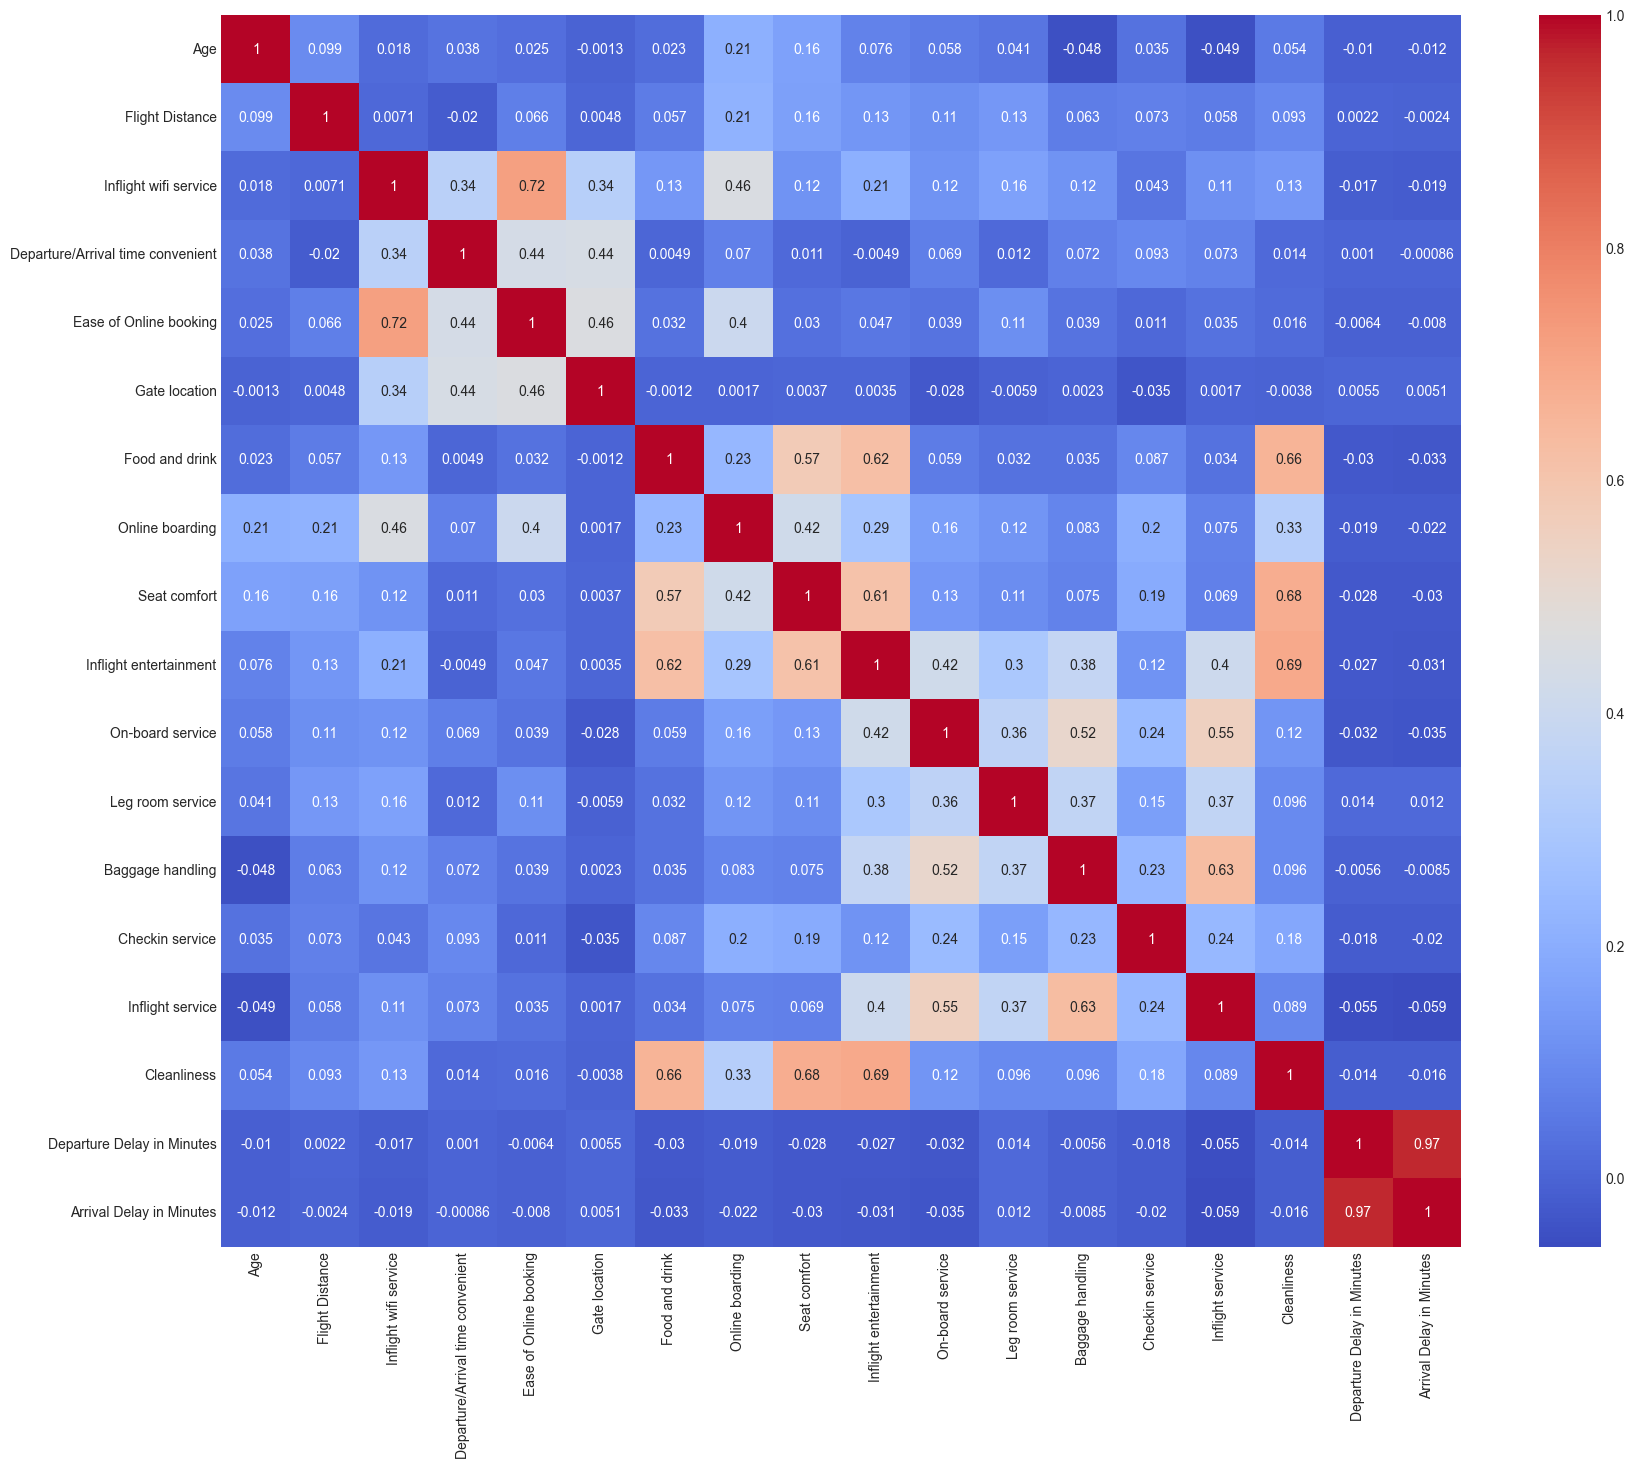

In [19]:
plt.figure(figsize=(20,16))
sns.heatmap(df_airplane[numeric_col].corr() , cmap='coolwarm', annot=True);

In [20]:
# kiem tra nall
for col in df_airplane.columns:
    nan_col = df_airplane[col].isna().sum()
    print(f'Cột {col} có số dữ liệu NaN là: {nan_col}')

Cột Gender có số dữ liệu NaN là: 0
Cột Customer Type có số dữ liệu NaN là: 0
Cột Age có số dữ liệu NaN là: 0
Cột Type of Travel có số dữ liệu NaN là: 0
Cột Class có số dữ liệu NaN là: 0
Cột Flight Distance có số dữ liệu NaN là: 0
Cột Inflight wifi service có số dữ liệu NaN là: 0
Cột Departure/Arrival time convenient có số dữ liệu NaN là: 0
Cột Ease of Online booking có số dữ liệu NaN là: 0
Cột Gate location có số dữ liệu NaN là: 0
Cột Food and drink có số dữ liệu NaN là: 0
Cột Online boarding có số dữ liệu NaN là: 0
Cột Seat comfort có số dữ liệu NaN là: 0
Cột Inflight entertainment có số dữ liệu NaN là: 0
Cột On-board service có số dữ liệu NaN là: 0
Cột Leg room service có số dữ liệu NaN là: 0
Cột Baggage handling có số dữ liệu NaN là: 0
Cột Checkin service có số dữ liệu NaN là: 0
Cột Inflight service có số dữ liệu NaN là: 0
Cột Cleanliness có số dữ liệu NaN là: 0
Cột Departure Delay in Minutes có số dữ liệu NaN là: 0
Cột Arrival Delay in Minutes có số dữ liệu NaN là: 310
Cột satisfac

In [21]:
# kiem tra nall
for col in df_airplane.columns:
    nan_col = df_airplane[col].isna().sum() 
    if nan_col > 0:
        if nan_col/len(df_airplane)>0.2:
            df_airplane = df_airplane.drop(columns=col)
        else:
            df_airplane =df_airplane.fillna(df_airplane[col].mean())


In [22]:
# kiem tra outliners
import matplotlib.pyplot as plt
import seaborn as sns

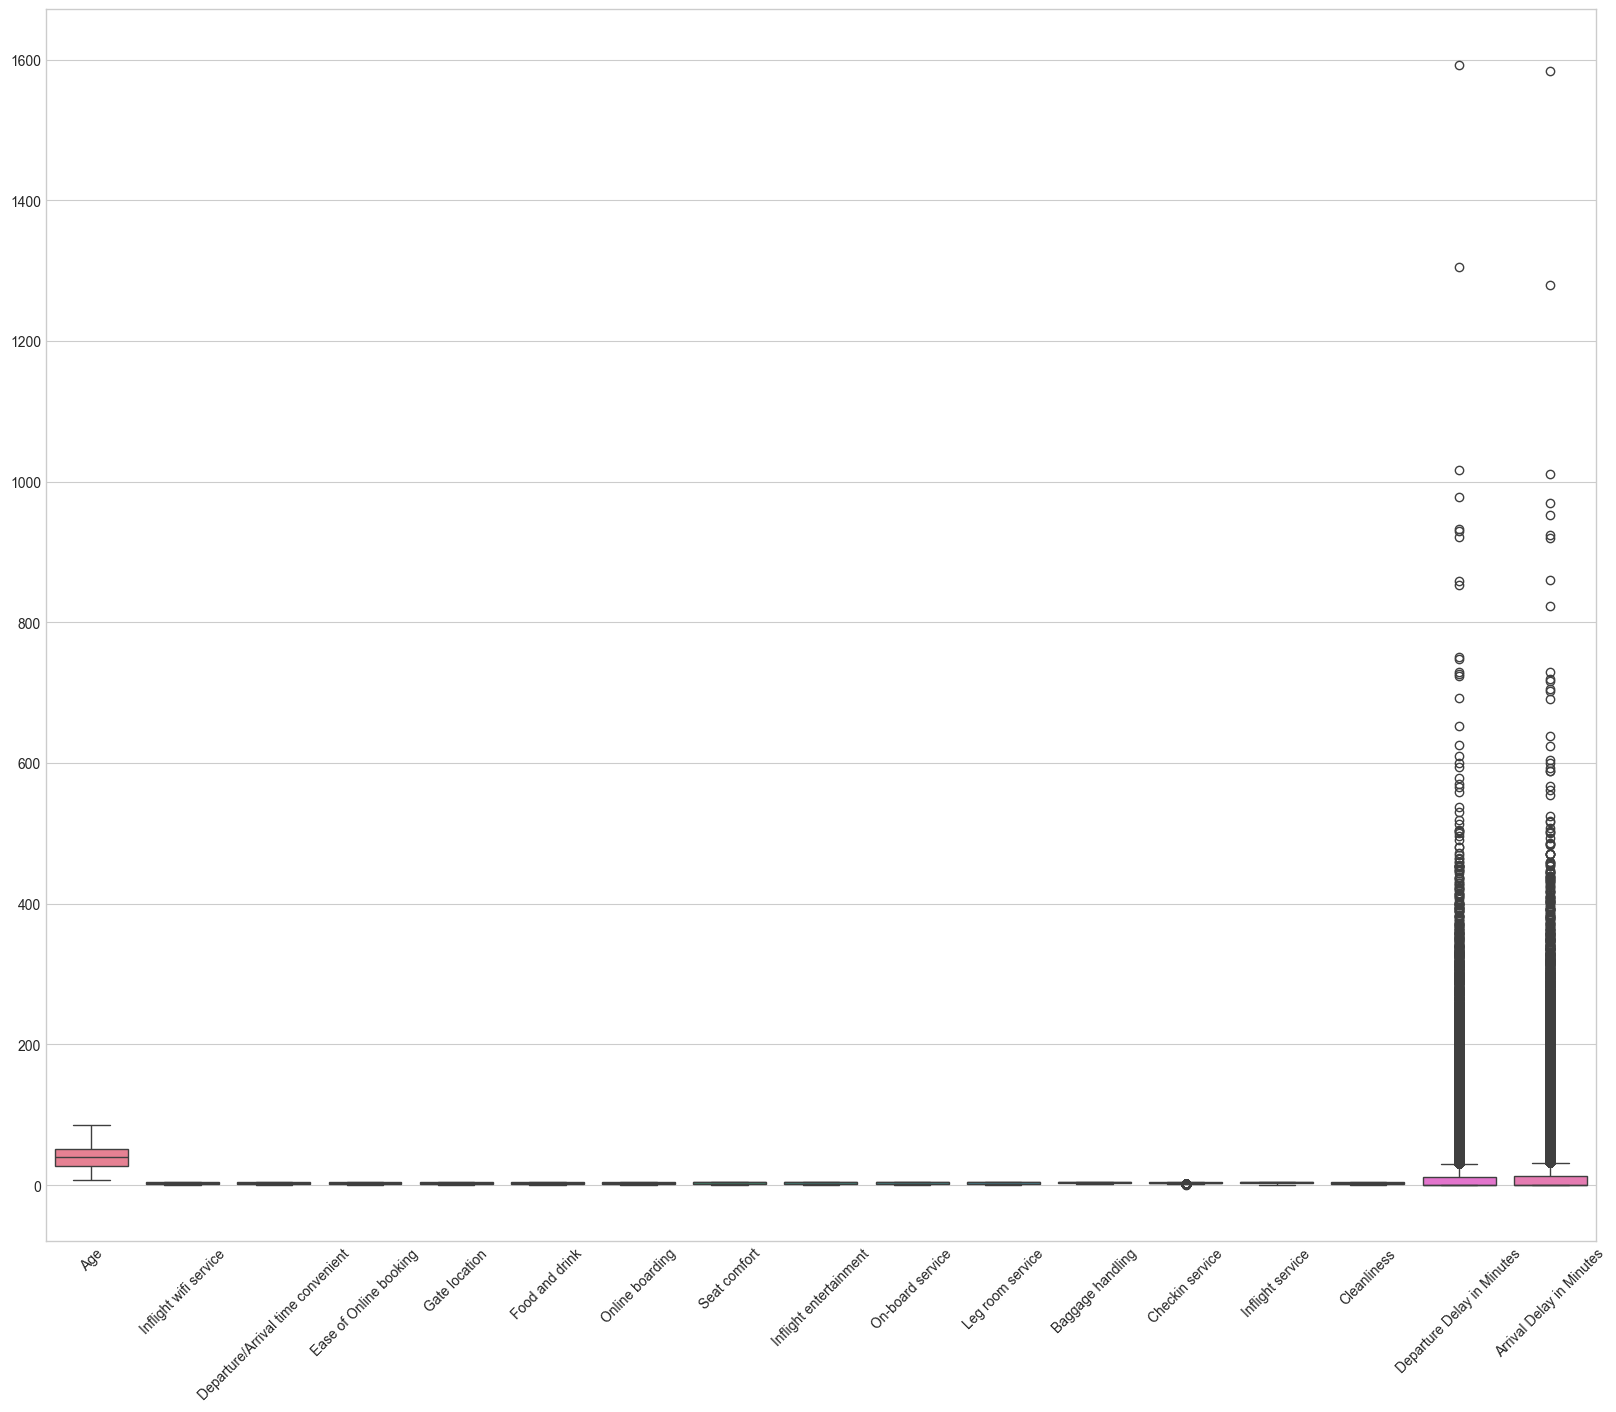

In [23]:
plt.figure(figsize=(20,16))
sns.boxplot(df_airplane[numeric_col].drop(columns='Flight Distance'))
plt.xticks(rotation=45);


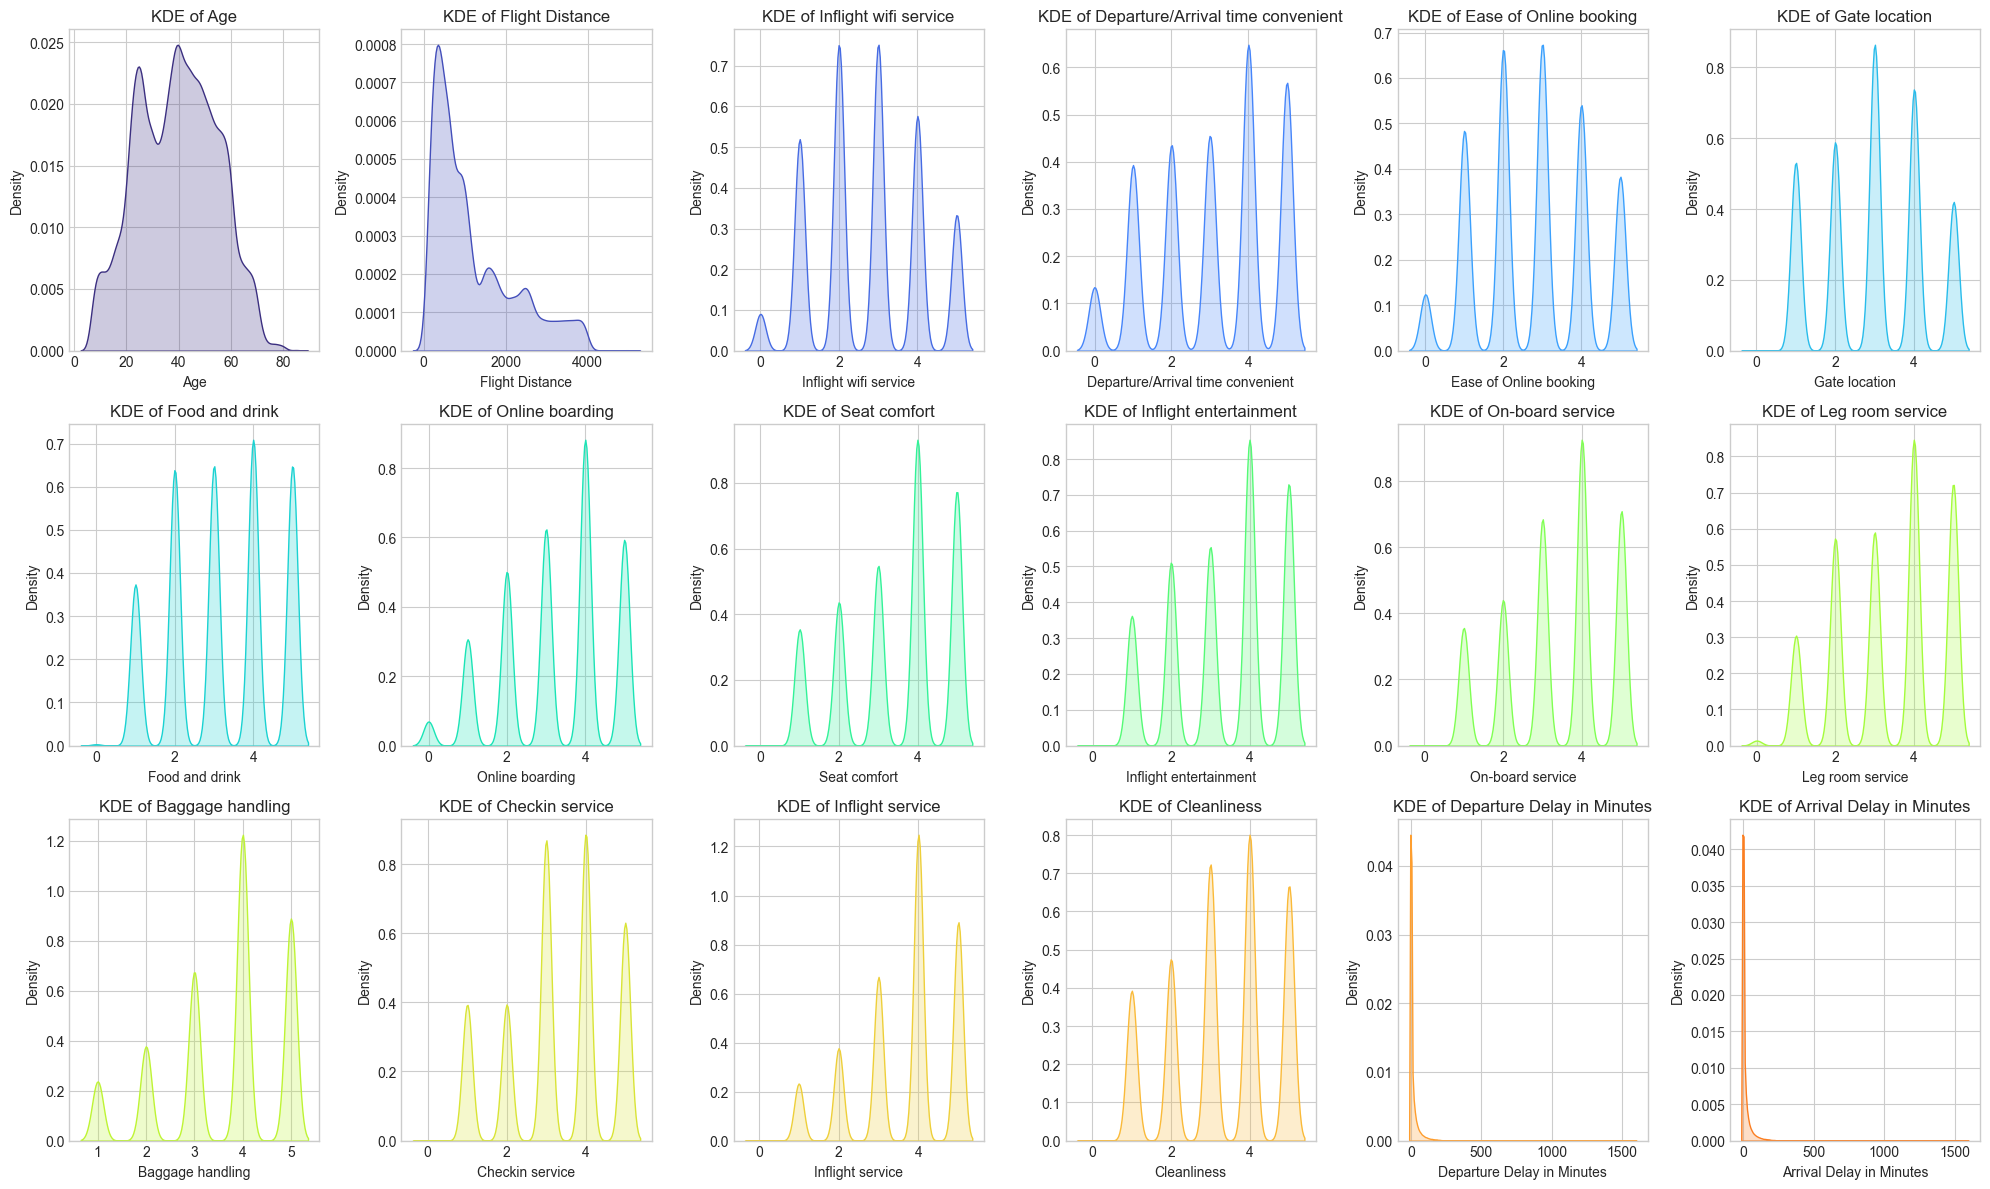

In [24]:
vibrant_palette = sns.color_palette("turbo", len(df_airplane.columns))

fig, axes = plt.subplots(3, 6, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(df_airplane[numeric_col].columns):
    sns.kdeplot(data=df_airplane[col], ax=axes[i],  color=vibrant_palette[i % len(vibrant_palette)], fill=True)
    axes[i].set_title(f"KDE of {col}")

plt.tight_layout()

#### Nhận xét 
1. Flight Distance
- Phân phối lệch phải (right-skewed): Phần lớn các giá trị tập trung trong khoảng từ 0 đến 2000.
- Một số giá trị rất lớn (hơn 4000), nhưng tần suất thấp, có thể đại diện cho các chuyến bay dài.
- Đây là kiểu phân phối phổ biến cho dữ liệu khoảng cách bay, với nhiều chuyến bay ngắn hơn các chuyến bay dài.
2. Inflight Wifi Service
- Dữ liệu phân phối thành các nhóm riêng biệt, phản ánh các mức đánh giá (0–5).
- Tập trung lớn nhất ở mức đánh giá trung bình (3), trong khi đánh giá thấp (0, 1) và cao (4, 5) ít hơn.
- Phân phối dạng này thường gặp trong dữ liệu khảo sát hoặc đánh giá dịch vụ, nơi người dùng có xu hướng chọn mức trung tính hơn là cực đoan.

In [25]:
# fig, ax = plt.subplots(figsize=(20,10), nrows=2, ncols=3)
# ax = ax.flatten()
# vibrant_palette = sns.color_palette("turbo", len(df_airplane.columns))
# for i, col in enumerate(df_airplane[categorical_col].columns):
#     sns.kdeplot(df_airplane[col].value_counts(), ax=ax[i], color=vibrant_palette[i% len(df_airplane.columns)])
# plt.tight_layout();

### Encode

In [26]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [27]:
df_airplane[categorical_col].columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [28]:
encode = LabelEncoder()
for col in df_airplane[categorical_col].columns:

    df_airplane[col] = encode.fit_transform(df_airplane[col])
# df_airplane = pd.DataFrame(df_airplane, columns=[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
#                                                     'Flight Distance', 'Inflight wifi service',
#                                                     'Departure/Arrival time convenient', 'Ease of Online booking',
#                                                     'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
#                                                     'Inflight entertainment', 'On-board service', 'Leg room service',
#                                                     'Baggage handling', 'Checkin service', 'Inflight service',
#                                                     'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
#                                                     'satisfaction']])
df_airplane

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [29]:
for

SyntaxError: invalid syntax (3193057967.py, line 1)

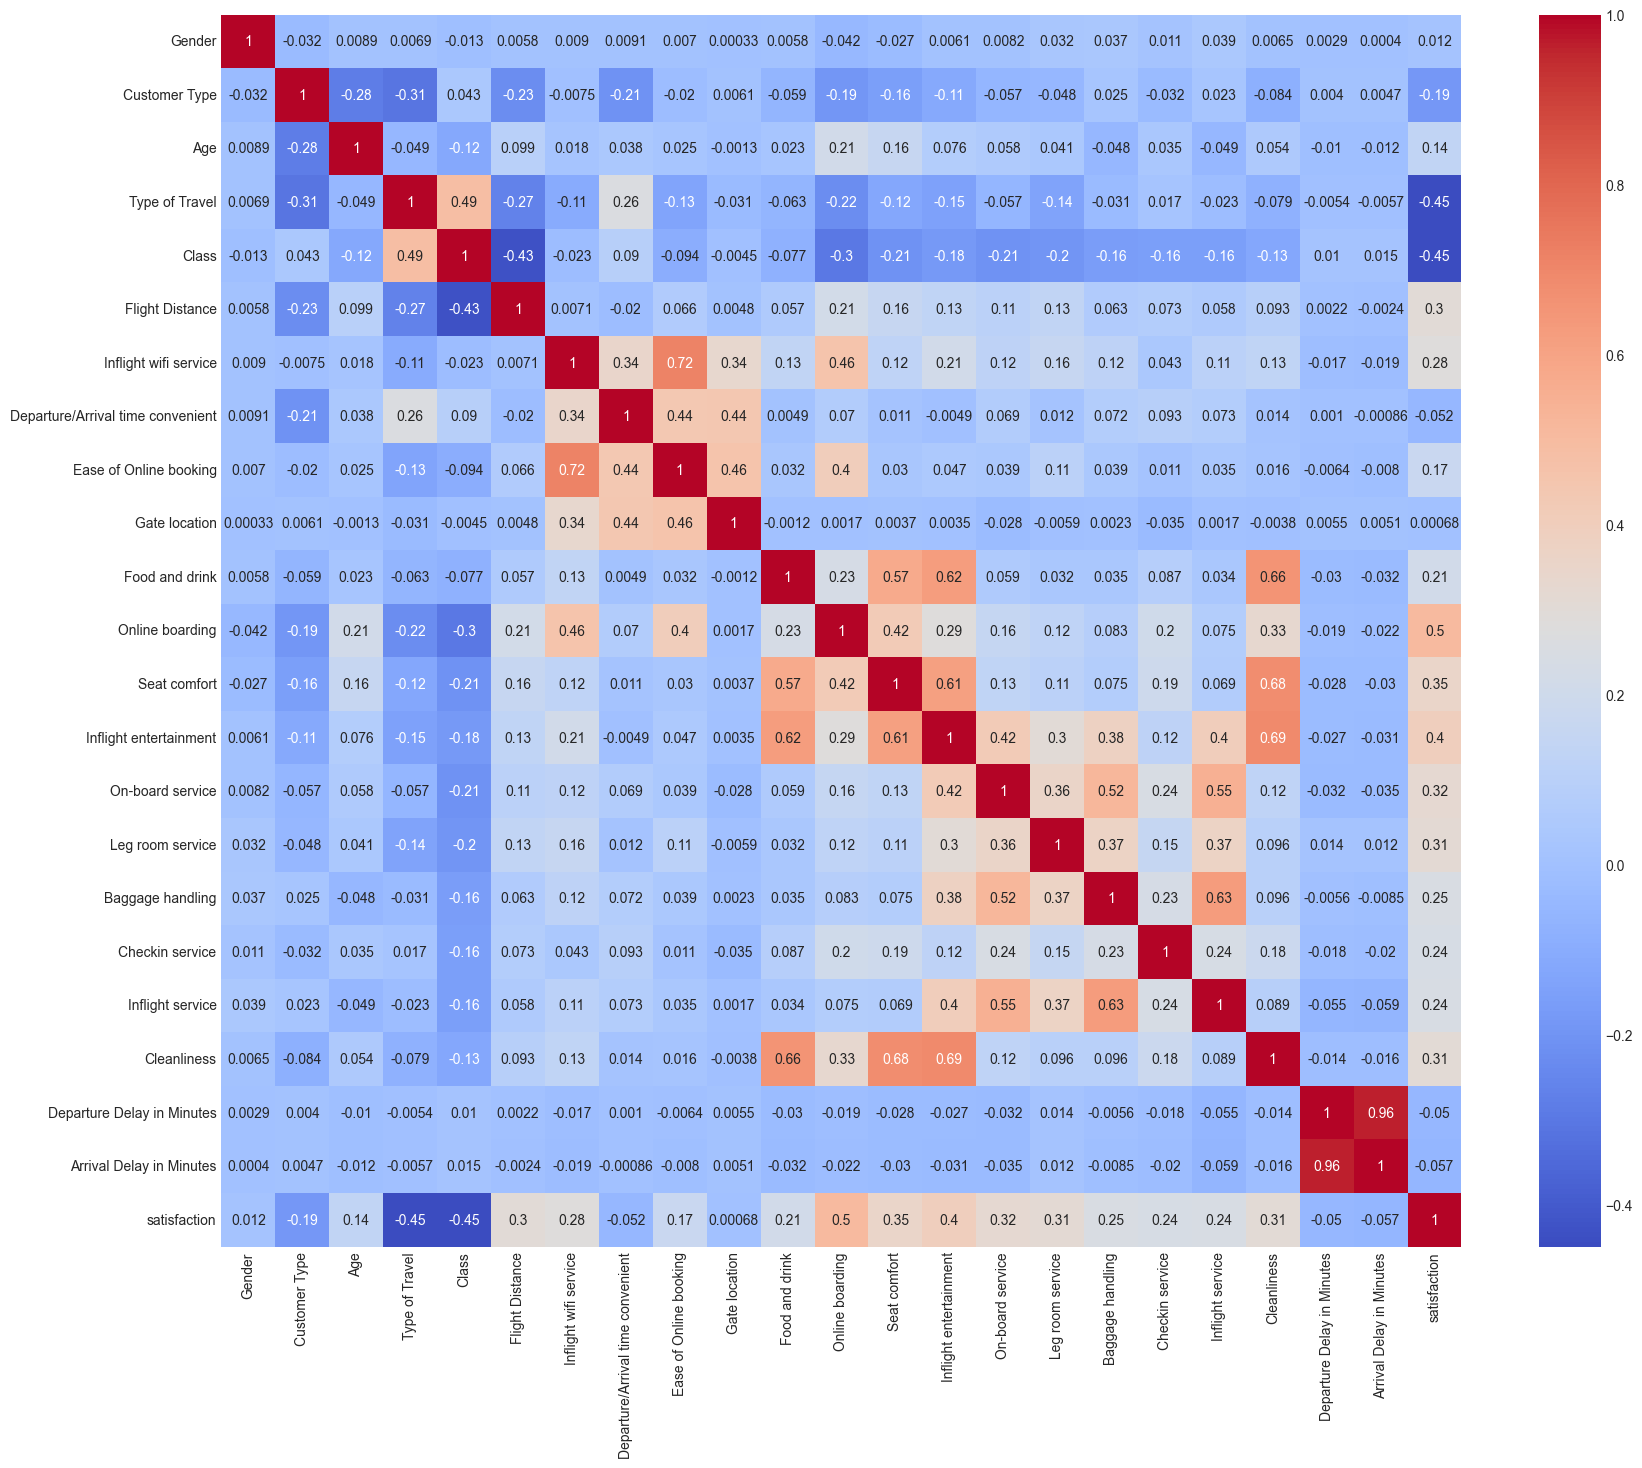

In [30]:
plt.figure(figsize=(20,16))
sns.heatmap(df_airplane.corr(), annot=True, cmap='coolwarm');

In [111]:
# sns.pairplot(df_airplane[['Age',
#                             'Flight Distance',
#                             'Inflight wifi service',
#                             'Departure/Arrival time convenient',
#                             'Ease of Online booking',
#                             'Gate location',
#                             'Food and drink',
#                             'Online boarding',
#                             'Seat comfort',
#                             'Inflight entertainment',
#                             'On-board service',
#                             'Leg room service',
#                             'Baggage handling',
#                             'Checkin service',
#                             'Inflight service',
#                             'Cleanliness',
#                             'Departure Delay in Minutes',
#                             'Arrival Delay in Minutes',
#                             'satisfaction']], hue='satisfaction', diag_kind='kde', corner=True);

In [112]:
# sns.pairplot(df_airplane, hue='satisfaction', diag_kind='kde', corner=True);

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score ,classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

In [32]:
# Chia dữ liệu thành Train và Test
X = df_airplane.drop(columns=['satisfaction'])
y = df_airplane['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Chuẩn hóa dữ liệu chỉ trên tập Train
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Áp dụng các tham số chuẩn hóa từ X_train lên X_test

# PCA trên tập Train
pca = PCA()
pca.fit(X_train_scaled)
# pca.fit(X_test_scaled)

explained_var = pca.explained_variance_ratio_
print(f'Ty le phuong sai giai thich', explained_var)

# chon tren phuong sai tich luy
cumsum_explained_var = np.cumsum(pca.explained_variance_ratio_)
print(f'Phuong sai tich luy', cumsum_explained_var)

# lua chon thanh phan chinh
n_components = np.argmax(cumsum_explained_var >= 0.9)+1
print(f'So luong thanh phan chinh duoc chon la: {n_components}')

pca= PCA(n_components=n_components)
X_pca_train_reduced = pca.fit_transform(X_train_scaled)

X_pca_test_reduced = pca.transform(X_test_scaled)



Ty le phuong sai giai thich [0.66797955 0.07195419 0.0442425  0.03810737 0.02795103 0.02601385
 0.01712844 0.01502287 0.01312367 0.01114763 0.0105642  0.00892515
 0.00836399 0.00661948 0.00644001 0.00516447 0.0046201  0.0045523
 0.00405245 0.00323238 0.00253684 0.00225751]
Phuong sai tich luy [0.66797955 0.73993374 0.78417624 0.82228361 0.85023464 0.87624849
 0.89337693 0.9083998  0.92152347 0.93267109 0.94323529 0.95216045
 0.96052444 0.96714392 0.97358393 0.97874841 0.98336851 0.98792081
 0.99197326 0.99520564 0.99774249 1.        ]
So luong thanh phan chinh duoc chon la: 8


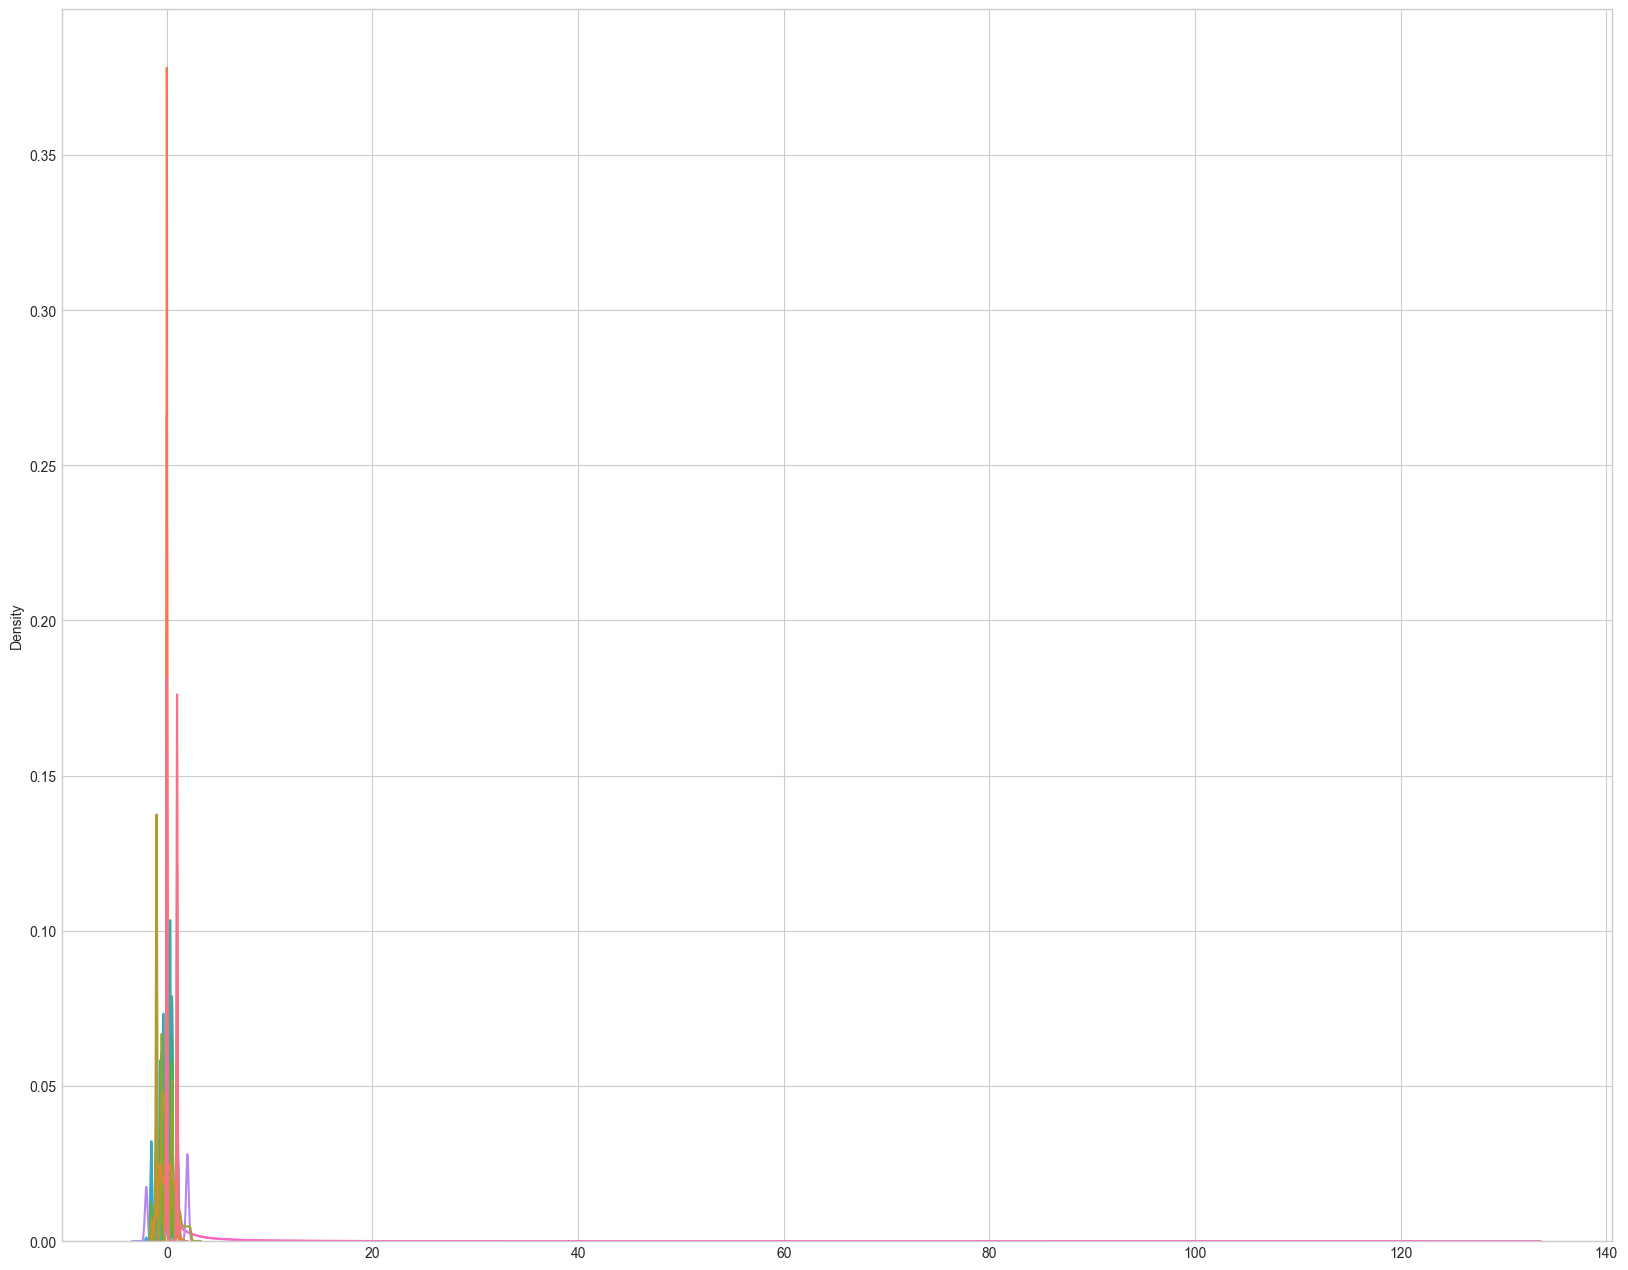

In [33]:
plt.figure(figsize=(20,16))
sns.kdeplot(X_train_scaled, legend=False);

In [35]:
from statsmodels.api import Logit
import statsmodels.api as sm

In [36]:
X = X_pca_train_reduced
X = sm.add_constant(X_pca_train_reduced)
model = Logit(y_train, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.392766
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                93513
Model:                          Logit   Df Residuals:                    93504
Method:                           MLE   Df Model:                            8
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.4259
Time:                        13:17:27   Log-Likelihood:                -36729.
converged:                       True   LL-Null:                       -63979.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5116      0.010    -52.356      0.000      -0.531      -0.492
x1            -0.0486      0.

In [37]:
# Huấn luyện Logistic Regression
model = LogisticRegression()
model.fit(X_pca_train_reduced, y_train)

# Intercept và Coefficients
intercept = model.intercept_
coefficients = model.coef_
print(f'He so chan Intercept: {intercept}')
print(f'He So Hoi Quy Ung Voi Tung Dac Trung Coefficients: {coefficients}')
print('--================================--')

# Dự đoán trên tập Test
y_pred = model.predict(X_pca_test_reduced)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print('--================================--')
print("Classification Report:\n", classification_report(y_test, y_pred))

He so chan Intercept: [-0.51174533]
He So Hoi Quy Ung Voi Tung Dac Trung Coefficients: [[-0.04856878  1.19925777 -0.77027722 -0.66238748  0.39843121  1.02715335
  -0.77932459  0.1966004 ]]
--================================--
Accuracy: 0.8458281204888846
--================================--
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      5868
           1       0.84      0.80      0.82      4523

    accuracy                           0.85     10391
   macro avg       0.84      0.84      0.84     10391
weighted avg       0.85      0.85      0.85     10391



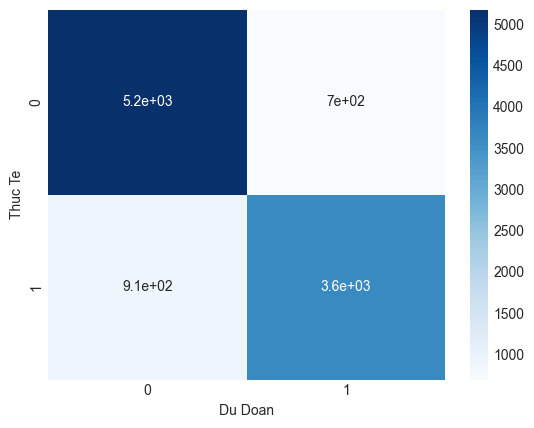

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True);
plt.xlabel('Du Doan')
plt.ylabel("Thuc Te");